In [296]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import display
import seaborn as sns

from scipy import stats
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, classification_report
import plotly.express as px
import joblib

from sklearn import set_config
sns.set_palette('Set2')
set_config(display='diagram')

from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

### Set up and explore data
* load data set
* explore and understand dataset

In [222]:
heart = pd.read_csv('data/heart.csv')

heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [223]:
display(heart.describe(),  heart.nunique(), heart.dtypes)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

From the dataset, it appears that nominal attributes have already been
discretized
The features that were originally nominal are
1. age - age in years

2. sex - sex (1 = male; 0 = female)

3. cp - chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 4 = asymptomatic)

4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)

5. chol - serum cholestoral in mg/dl

6. fbs - fasting blood sugar > 120 mg/dl (1 = true; 0 = false)

7. restecg - resting electrocardiographic results (0 = normal; 1 = having ST-T; 2 = hypertrophy)

8. thalach - maximum heart rate achieved

9. exang - exercise induced angina (1 = yes; 0 = no)

10. oldpeak - ST depression induced by exercise relative to rest

11. slope - the slope of the peak exercise ST segment (1 = upsloping; 2 = flat; 3 = downsloping)

12. ca - number of major vessels (0-3) colored by flourosopy

13. thall: Thallium Stress Test result (0-3)

14. output - diagnosis of heart disease (angiographic disease status) (Value 0 = < diameter narrowing; Value 1 = > 50% diameter narrowing)
#### output: 0 = less chance of heart attack, 1 = more chance of heart attack

In [224]:
heart.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [225]:
for col in heart.columns:
    print(col, heart[col].unique())

age [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
sex [1 0]
cp [3 2 1 0]
trtbps [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
chol [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131]
fbs [1 0]
restecg

Shows that we are not missing any value and values are not out of place

## Formulate a classification problem for dataset & solve using Decision Tree
* Use at least 2 different train-test split (0.25 and 0.2)
* Use at least 2 different cross-validation options (5 fold and 10 fold)
* compare classifier performance

### Dataset - Heart Attack Analysis & Prediction dataset
* source https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset
### Question: Predict output, the chance of heart of heart attack using predictor variables
### Methods Used: Code that will be listed below

In [226]:
X = heart.drop('output', axis=1)
y = heart['output']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [227]:
dt = DecisionTreeClassifier(random_state=55)
dt_grid = GridSearchCV(dt, {}, cv=5)
dt_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=55),
             param_grid={})

In [228]:
print('train score', dt_grid.best_score_)
print('test score', dt_grid.score(X_test, y_test))
print('std dev', dt_grid.cv_results_['std_test_score'][dt_grid.best_index_])

print('Confusion Matrix \n',confusion_matrix(dt_grid.predict(X_test),y_test), '\n')
print('Accuracy Score \n', dt_grid.score(X_test, y_test), '\n')
print('Classification Report \n',classification_report(dt_grid.predict(X_test),y_test))

train score 0.7094685990338163
test score 0.8026315789473685
std dev 0.0361868963859292
Confusion Matrix 
 [[29  9]
 [ 6 32]] 

Accuracy Score 
 0.8026315789473685 

Classification Report 
               precision    recall  f1-score   support

           0       0.83      0.76      0.79        38
           1       0.78      0.84      0.81        38

    accuracy                           0.80        76
   macro avg       0.80      0.80      0.80        76
weighted avg       0.80      0.80      0.80        76



### Attempt with different train test split and different cross validation for tree classifier
* Test size will be reduce form .25 to .15
* Cross validation will increase from 5 to 10

In [229]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X,y, test_size=0.20, random_state=42)

In [230]:
dt_grid2 = GridSearchCV(dt, {}, cv=10)
dt_grid2.fit(X_train_2, y_train_2)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=55),
             param_grid={})

In [231]:
print('train score', dt_grid2.best_score_)
print('test score', dt_grid2.score(X_test_2, y_test_2))
print('std dev', dt_grid2.cv_results_['std_test_score'][dt_grid2.best_index_])

print('Confusion Matrix \n',confusion_matrix(dt_grid2.predict(X_test_2),y_test_2), '\n')
print('Accuracy Score \n', dt_grid2.score(X_test_2, y_test_2), '\n')
print('Classification Report \n',classification_report(dt_grid2.predict(X_test_2),y_test_2))

train score 0.7436666666666667
test score 0.8360655737704918
std dev 0.07126944179193023
Confusion Matrix 
 [[26  7]
 [ 3 25]] 

Accuracy Score 
 0.8360655737704918 

Classification Report 
               precision    recall  f1-score   support

           0       0.90      0.79      0.84        33
           1       0.78      0.89      0.83        28

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



### Evaluation between two tree classifiers
From scores of both classifiers suggests underfitting and would probably
performed better with standardization and dimensionality reduction of
 the data before training our model. Also it appears that an
increase in train size seems to increase the test score and
increase in CV folds seems to increase variability and makes sense
as 10 folds for a small size would cause an increase in variance

## Formulate a classification problem for dataset & solve using K-Nearest-Neighbor Method
* Use at least 2 different train-test split (0.25 test size and 0.20 test size)
* Use at least 2 different cross-validation options (5 fold and 10 fold)
* compare classifier performances


In [232]:
# This is training with .25 test split and .75 train split
# train with cv fold = 5
knn_grid = GridSearchCV(KNeighborsClassifier(), {}, cv=5)
knn_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), param_grid={})

In [233]:
print('train score', knn_grid.best_score_)
print('test score', knn_grid.score(X_test, y_test))
print('std dev', knn_grid.cv_results_['std_test_score'][knn_grid.best_index_])

print('Confusion Matrix \n',confusion_matrix(knn_grid.predict(X_test),y_test), '\n')
print('Accuracy Score \n', knn_grid.score(X_test, y_test), '\n')
print('Classification Report \n',classification_report(knn_grid.predict(X_test),y_test))

train score 0.6297584541062802
test score 0.6973684210526315
std dev 0.093212732516713
Confusion Matrix 
 [[22 10]
 [13 31]] 

Accuracy Score 
 0.6973684210526315 

Classification Report 
               precision    recall  f1-score   support

           0       0.63      0.69      0.66        32
           1       0.76      0.70      0.73        44

    accuracy                           0.70        76
   macro avg       0.69      0.70      0.69        76
weighted avg       0.70      0.70      0.70        76



### Attempt with different train test split and different cross validation for KNN classifier
* Test size will be reduce form .25 to .15
* Cross validation will increase from 5 to 10

In [234]:
# This is training with .20 test split and .80 train split
# train with cv fold = 3
knn_grid2 = GridSearchCV(KNeighborsClassifier(), {}, cv=10)
knn_grid2.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(), param_grid={})

In [235]:
print('train score', knn_grid2.best_score_)
print('test score', knn_grid2.score(X_test_2, y_test_2))
print('std dev', knn_grid2.cv_results_['std_test_score'][knn_grid2.best_index_])

print('Confusion Matrix \n',confusion_matrix(knn_grid2.predict(X_test_2),y_test_2), '\n')
print('Accuracy Score \n', knn_grid2.score(X_test_2, y_test_2), '\n')
print('Classification Report \n',classification_report(knn_grid2.predict(X_test_2),y_test_2))

train score 0.6268774703557313
test score 0.6885245901639344
std dev 0.12030623280385462
Confusion Matrix 
 [[18  8]
 [11 24]] 

Accuracy Score 
 0.6885245901639344 

Classification Report 
               precision    recall  f1-score   support

           0       0.62      0.69      0.65        26
           1       0.75      0.69      0.72        35

    accuracy                           0.69        61
   macro avg       0.69      0.69      0.69        61
weighted avg       0.69      0.69      0.69        61



### Evaluation comparision between two KNN classifiers

Between the two KNN classifier it appears that increasing the number of folds and
increasing the train size had decreased the performance of the model in all aspects.

## Using same dataset as earlier but changing question
### Dataset - Heart Attack Analysis & Prediction dataset
* source https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset
### Question: Predict chol - serum cholestorol in patients using predictor variables
### Methods Used: Code that will be listed below

## Formulate a Numerical prediction for dataset & solve using Linear Regression
* Use at least 2 different train-test split (0.25 test size and 0.50 test size)
* Use at least 2 different cross-validation options (5 fold and 3 fold)
* compare regressor performances

In [236]:
X = heart.drop('chol', axis=1)
y = heart['chol']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [237]:
lr_pipe = Pipeline([('scaler', StandardScaler()), ('lr', LinearRegression())])

In [238]:
lr_grid = GridSearchCV(lr_pipe, {}, cv=5)
lr_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('lr', LinearRegression())]),
             param_grid={})

In [239]:
print('train score', lr_grid.best_score_)
print('test score', lr_grid.score(X_test, y_test))
print('std dev', lr_grid.cv_results_['std_test_score'][lr_grid.best_index_])

train score -0.05932573916186505
test score -0.1603538511720659
std dev 0.25588682979376504


### Try different train-test-splits and cv folds for Linear Regressoin
* test size change from 0.25 to 0.50
* CV fold change form 5 to 3

In [240]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.5, random_state=42)

In [241]:
lr_grid2 = GridSearchCV(lr_pipe, {}, cv=3)
lr_grid2.fit(X_train_2, y_train_2)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('lr', LinearRegression())]),
             param_grid={})

In [242]:
print('train score', lr_grid2.best_score_)
print('test score', lr_grid2.score(X_test_2, y_test_2))
print('std dev', lr_grid2.cv_results_['std_test_score'][lr_grid2.best_index_])

train score -0.4324609448109374
test score -0.32419777529413873
std dev 0.7317258951202023


### Evaluation between linear regressors
From this dataset it seems trying to predict cholestorl with the predictor variables
does a very poor job
And in comparing the two regressors it appears that increasing test size and reducing number
of folds did even worse than the poor score that was orignally had.

## Formulate a Numerical prediction for dataset & solve using Non-Linear Regression
* Use at least 2 different train-test split
* Use at least 2 different cross-validation options
* compare regressor performances


* Support Vector Regression will be used with a poly kernel
* first evaluation will have .25 test size and 5 folds
* Same question of predicting cholesterol will be tested but using different model

In [244]:
svr_pipe = Pipeline([('scaler', StandardScaler()), ('svr', SVR(kernel='poly'))])

In [245]:
svr_grid = GridSearchCV(svr_pipe, {}, cv=5)
svr_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svr', SVR(kernel='poly'))]),
             param_grid={})

In [247]:
print('train score', svr_grid.best_score_)
print('test score', svr_grid.score(X_test, y_test))
print('std dev', svr_grid.cv_results_['std_test_score'][svr_grid.best_index_])

train score -0.11551545630340895
test score -0.030530582221110825
std dev 0.09320008024184157


### Try different train-test-splits and cv folds for Linear Regressoin
* test size change from 0.25 to 0.30
* CV fold change form 5 to 3

In [248]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.3, random_state=42)

In [250]:
svr_grid2 = GridSearchCV(svr_pipe, {}, cv=3)
svr_grid2.fit(X_train_2, y_train_2)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svr', SVR(kernel='poly'))]),
             param_grid={})

In [251]:
print('train score', svr_grid2.best_score_)
print('test score', svr_grid2.score(X_test_2, y_test_2))
print('std dev', svr_grid2.cv_results_['std_test_score'][svr_grid2.best_index_])

train score -0.03387384897510252
test score 0.004391712555274707
std dev 0.040489614501586786


### Evaluation between nonlinear regressors
It appears that increasing test size and decraasing number of folds increased
performance slightly although the relationship between our target for cholestorol
and the predictor variables appear to be non-existant. Also svr also performed better
than the linear model; but both models show a poor or nonexistant relationship


## Solving a clustering problem for your dataset using k-means algorithm
## Use K = 2, 3, 5

* ### Dataset: Mall Customer Segmentation Data source: https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python
* ### Question: Find spending patterns among customers in the data
* ### Methods: Will be displayed in the code below

In [257]:
# load data
customer = pd.read_csv('data/Mall_Customers.csv')
display(customer.head())
print(customer.shape)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


(200, 5)


In [261]:
# preprocess the data

customer.drop('CustomerID', axis=1, inplace=True)
customer = customer.rename(index=str, columns={
    'Annual Income (k$)': 'Income',
    'Spending Score (1-100)': 'SpendingScore'
})

In [274]:
def impute_spending_group(spending_score):
    if spending_score <= 35:
        return 'low'
    if spending_score > 35 and spending_score <= 65:
        return 'medium'
    if spending_score > 65:
        return 'high'

customer['SpendingGroup'] = customer['SpendingScore'].apply(impute_spending_group)
display(customer)


,Gender,Age,Income,SpendingScore,SpendingGroup
0,Male,19,15,39,medium
1,Male,21,15,81,high
2,Female,20,16,6,low
3,Female,23,16,77,high
4,Female,31,17,40,medium
...,...,...,...,...,...
195,Female,35,120,79,high
196,Female,45,126,28,low
197,Male,32,126,74,high
198,Male,32,137,18,low


In [271]:
processor = Pipeline([
    ('processing', ColumnTransformer([('gender_enc', OrdinalEncoder(), ['Gender']),
                                      ('spending_group_encoder', OrdinalEncoder(categories=[['low', 'medium', 'high']]), ['SpendingGroup']),
                                      ], remainder='passthrough')),
])

processor

Pipeline(steps=[('processing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('gender_enc',
                                                  OrdinalEncoder(),
                                                  ['Gender']),
                                                 ('spending_group_encoder',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high']]),
                                                  ['SpendingGroup'])]))])

In [275]:
X = processor.fit_transform(customer)

In [280]:
# apply k_means clustering

km = KMeans(random_state=42)



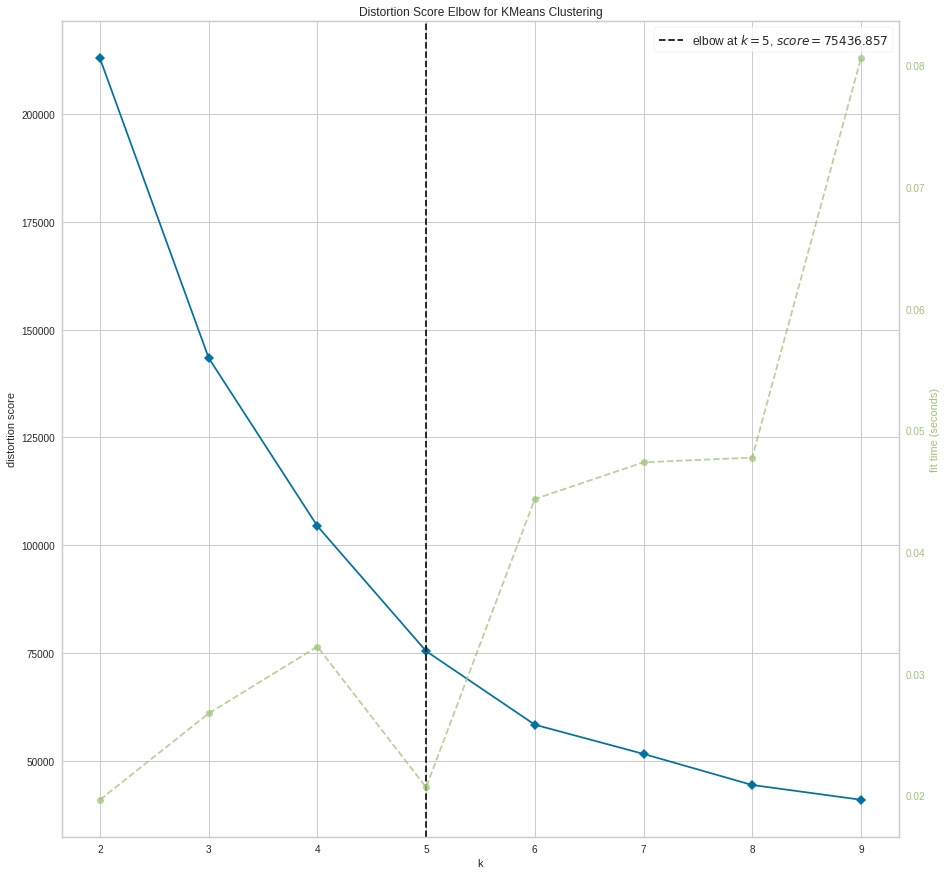

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [285]:
plt.figure(figsize=(15,15))

# run kmeans from k values 2 to 10
elbow_visualizer = KElbowVisualizer(km, k=(2,10))
elbow_visualizer.fit(X)
elbow_visualizer.show()

### Interpet elbow method
From the diagram it shows that 5 clusters would be optimal and even though instructions
asks to cluster from 2 to 5; we plotted more clusters in order to get a better view of data

### Graphing wiht different cluster numbers


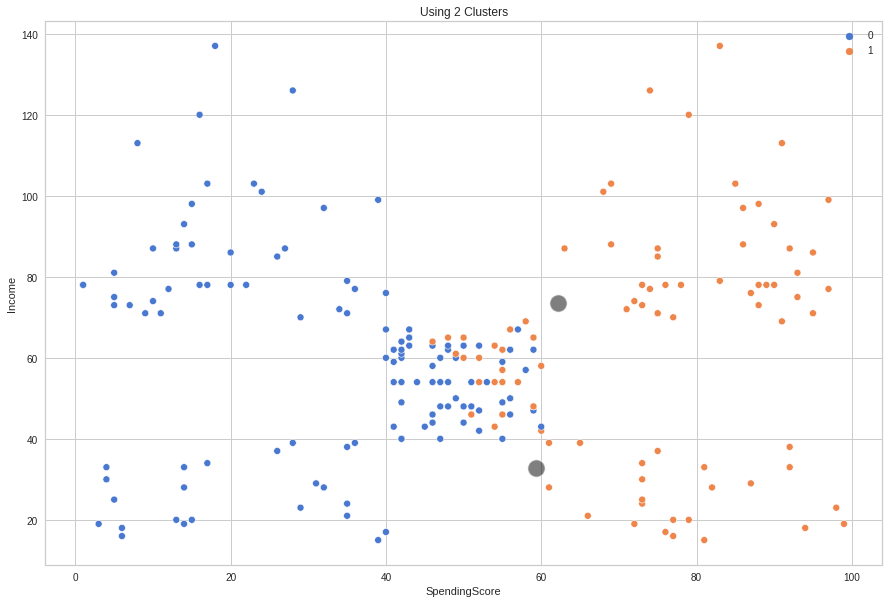

In [289]:
km2 = KMeans(n_clusters=2, random_state=42)
km2.fit(X)

kmean_clusters = km2.labels_
kmean_centroids = km2.cluster_centers_

plt.figure(figsize=(15, 10))
plt.title('Using 2 Clusters')
sns.scatterplot(data=customer, x='SpendingScore', y='Income', hue=kmean_clusters, palette='muted');
sns.scatterplot(x=kmean_centroids[:, 3], y=kmean_centroids[:, 4], color='black', s=300, alpha=0.5);

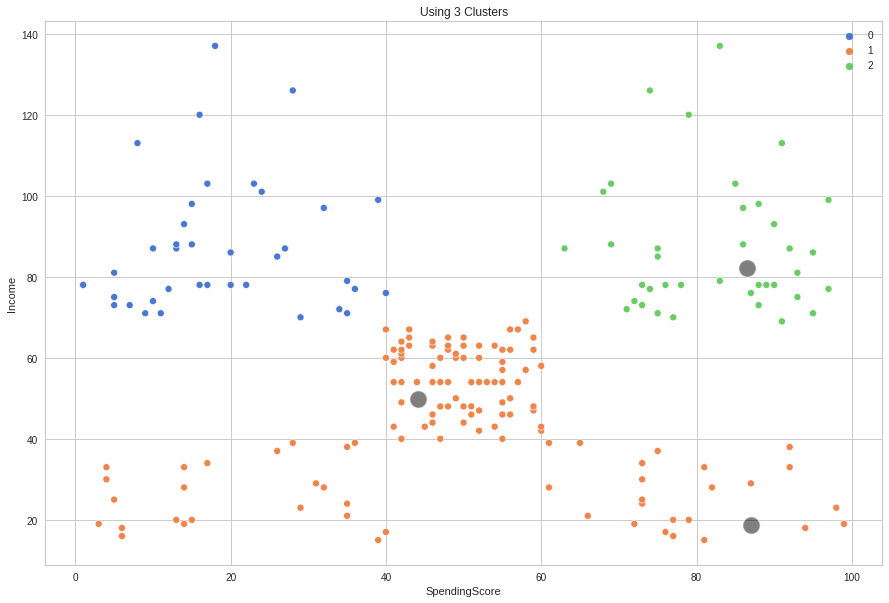

In [293]:
km3 = KMeans(n_clusters=3, random_state=42)
km3.fit(X)

kmean_clusters = km3.labels_
kmean_centroids = km3.cluster_centers_

plt.figure(figsize=(15, 10))
plt.title('Using 3 Clusters')
sns.scatterplot(data=customer, x='SpendingScore', y='Income', hue=kmean_clusters, palette='muted');
sns.scatterplot(x=kmean_centroids[:, 3], y=kmean_centroids[:, 4], color='black', s=300, alpha=0.5);

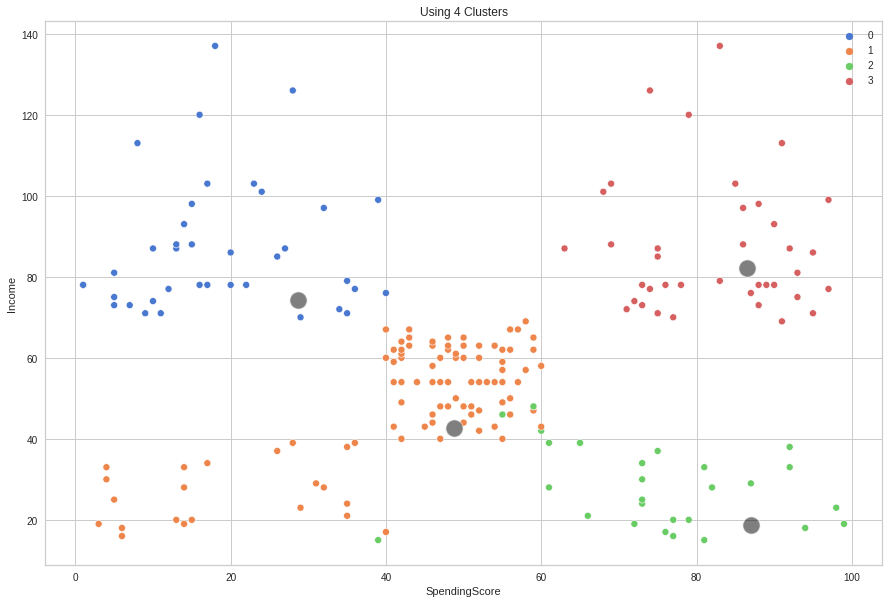

In [291]:
km4 = KMeans(n_clusters=4, random_state=42)
km4.fit(X)

kmean_clusters = km4.labels_
kmean_centroids = km4.cluster_centers_

plt.figure(figsize=(15, 10))
plt.title('Using 4 Clusters')
sns.scatterplot(data=customer, x='SpendingScore', y='Income', hue=kmean_clusters, palette='muted');
sns.scatterplot(x=kmean_centroids[:, 3], y=kmean_centroids[:, 4], color='black', s=300, alpha=0.5);

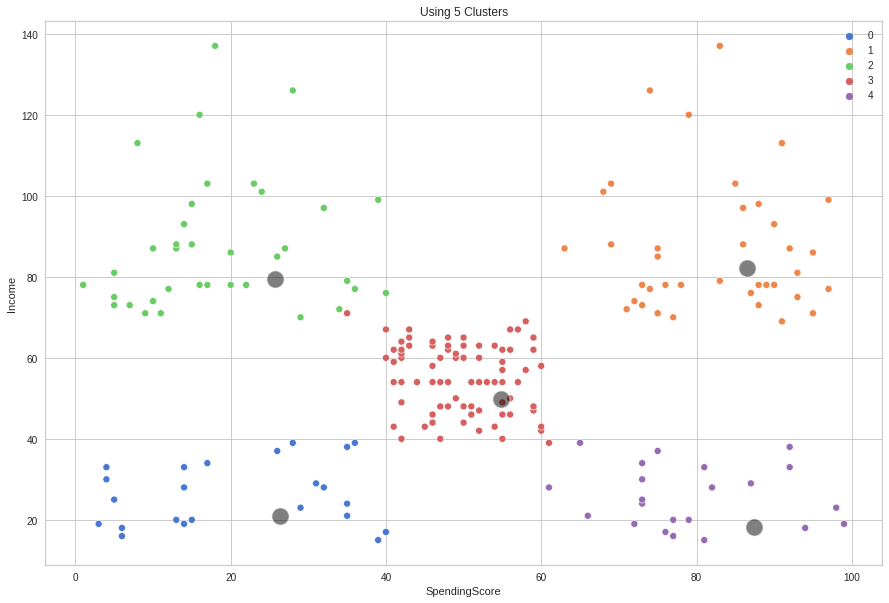

In [297]:
km5 = KMeans(n_clusters=5, random_state=42)
km5.fit(X)

kmean_clusters = km5.labels_
kmean_centroids = km5.cluster_centers_

plt.figure(figsize=(15, 10))
plt.title('Using 5 Clusters')
sns.scatterplot(data=customer, x='SpendingScore', y='Income', hue=kmean_clusters, palette='muted');
sns.scatterplot(x=kmean_centroids[:, 3], y=kmean_centroids[:, 4], color='black', s=300, alpha=0.5);

In [298]:
fig = px.scatter_3d(
    customer,
    x='Age',
    y='SpendingScore',
    z='Income',
    color=kmean_clusters.astype(str),
    opacity=0.8,
    height=700,
    width=700,
    title='Clusters in Age-SpendingScore-Income space',
    color_discrete_sequence=px.colors.qualitative.Set2
)
fig.show()

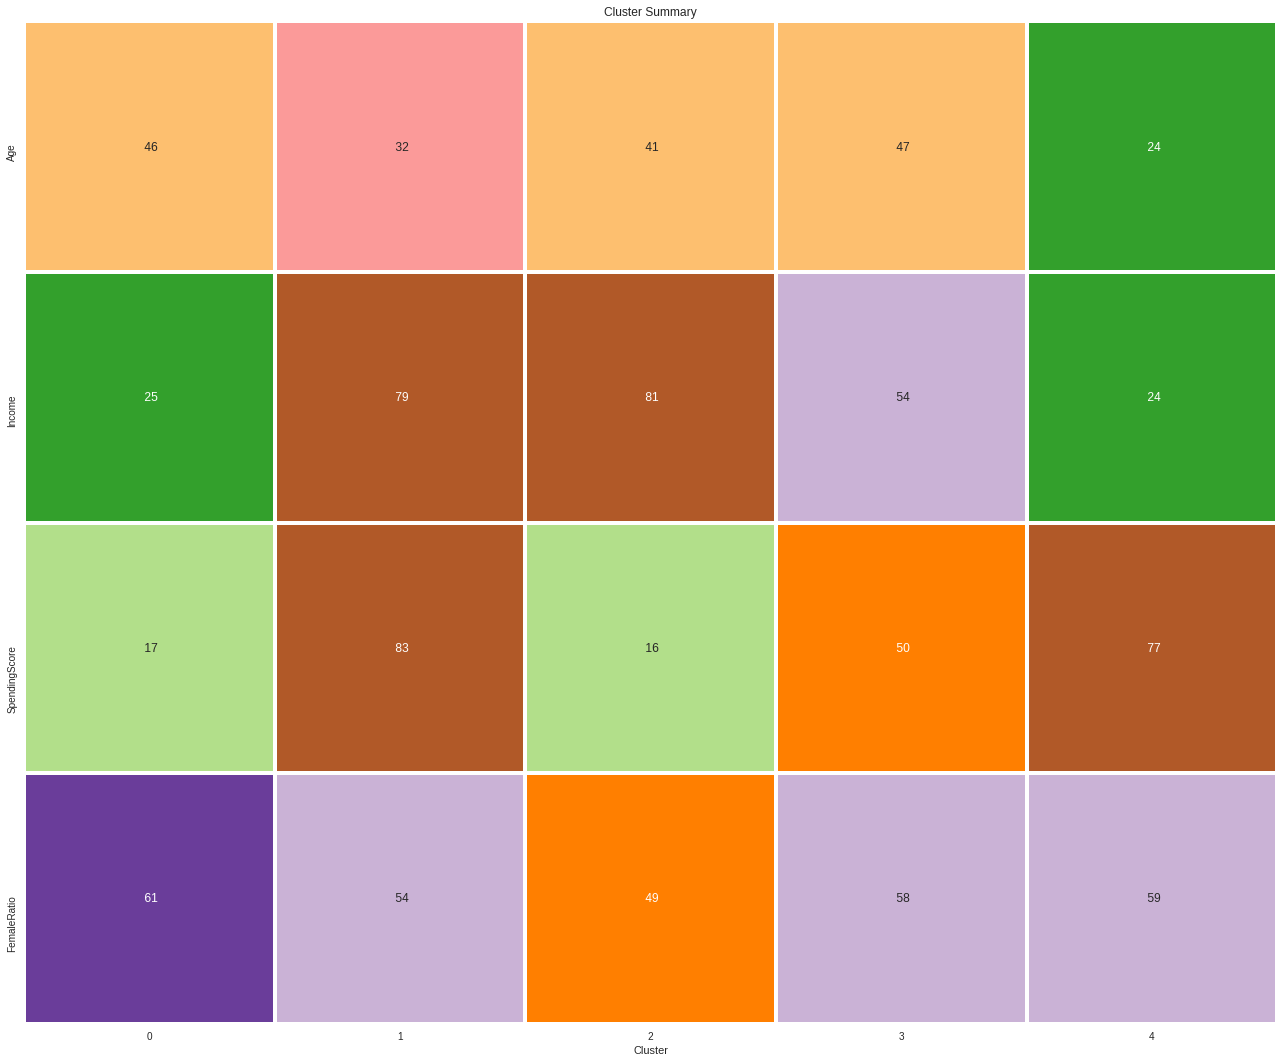

In [305]:
customer['Cluster'] = kmean_clusters
cluster_heatmap_df = customer.groupby(['Cluster'])[['Age', 'Income', 'SpendingScore']].median()

cluster_heatmap_df['FemaleRatio'] = customer[customer['Gender'] == 'Female'].groupby(['Cluster']).count()['Gender'] / customer.groupby(['Cluster']).count()['Gender'] * 100

fig, ax = plt.subplots(1, 1, figsize=(18, 18))

sns.heatmap(cluster_heatmap_df.T,
    square=True,
    linewidth=3,
    vmax=80,
    vmin=1,
    cbar=False,
    cmap='Paired',
    annot=True,
    fmt='3.0f',
    ax=ax,
);

ax.set_title('Cluster Summary');
plt.tight_layout()

### Evaluation of kmeans clustering
#### From the 5 cluster we have
* Cluster 0: 39% Male, Low spending score, Low income, upper half 40s age
* Cluster 1: 46% Male, High Spending score, High income, 30s age
* Cluster 2: 51% Male, Low Spending Score, High Income, lower half 40s age
* Cluster 3: 42% Male, Moderate Spending score, Moderate Income, upper half 40 age
* Cluster 4: 41% Male, High Spending Score, Low income, Young 20s age

Our most profitable segment appears to be 46% males and 64% females who are have high income around 30s age
And 41% males and 69% females who are have low incomes and young 20s
